# LeNet Lab

![LeNet Architecture](lenet.png)

Source: Yan LeCun http://yann.lecun.com/exdb/lenet/

## Load Data
Load the MNIST data, which comes pre-loaded with TensorFlow.

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", reshape=False)

X_train_raw, y_train           = mnist.train.images, mnist.train.labels
X_validation_raw, y_validation = mnist.validation.images, mnist.validation.labels
X_test_raw, y_test             = mnist.test.images, mnist.test.labels

print()
print("Training Set: {}".format(X_train_raw.shape))
print("Validation Set: {}".format(X_validation_raw.shape))
print("Test Set:       {}".format(X_test_raw.shape))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz

Training Set: (55000, 28, 28, 1)
Validation Set: (5000, 28, 28, 1)
Test Set:       (10000, 28, 28, 1)


## Visualize Data

View a sample from the dataset.

- The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.
- However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, we pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).

Updated Image Shape: (55000, 32, 32, 1)


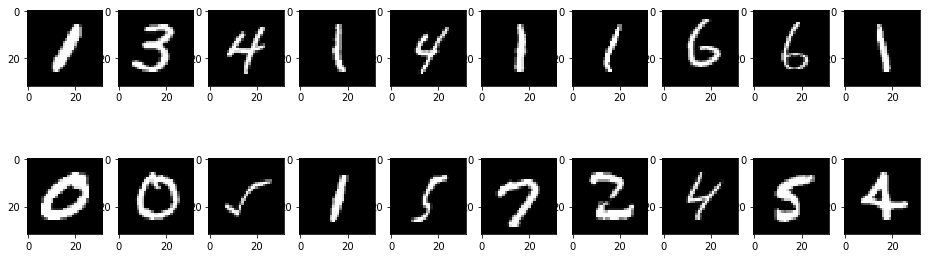

In [4]:
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X_train      = np.pad(X_train_raw,      ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_validation = np.pad(X_validation_raw, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test       = np.pad(X_test_raw,       ((0,0),(2,2),(2,2),(0,0)), 'constant')

print("Updated Image Shape: {}".format(X_train.shape))

fig = plt.figure(figsize=(16,5))

X_train, y_train = shuffle(X_train, y_train)
for i in range(20):
    image = X_train[i].squeeze()
    fig.add_subplot(2,10, i+1)
    plt.imshow(image, cmap="gray")

##  Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [5]:
import tensorflow as tf
def conv2d(x, W, bias, stride=1, padding='VALID'):
    y = tf.nn.conv2d(x, W, strides = [1, stride, stride, 1], padding=padding)
    y = tf.nn.bias_add(y, bias)
    y = tf.nn.relu(y)
    return y

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # TODO: Activation.
    w1 = tf.Variable(tf.truncated_normal([5, 5, 1, 6], mean=mu, stddev=sigma))
    b1 = tf.Variable(tf.truncated_normal([6], mean=mu, stddev=sigma))
    conv1 = conv2d(x, w1, b1)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    pool1 = maxpool2d(conv1)
        
    # TODO: Layer 2: Convolutional. Output = 10x10x16.    
    # TODO: Activation.
    w2 = tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean=mu, stddev=sigma))
    b2 = tf.Variable(tf.truncated_normal([16], mean=mu, stddev=sigma))
    conv2 = conv2d(pool1, w2, b2)
    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    pool2 = maxpool2d(conv2)    

    # TODO: Flatten. Input = 5x5x16 = 400.
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.    
    # TODO: Activation.    
    fc1 = tf.reshape(pool2, [-1, 5*5*16])
    wd1 = tf.Variable(tf.truncated_normal([5*5*16, 120]))
    bd1 = tf.Variable(tf.truncated_normal([120]))
    fc1 = tf.add(tf.matmul(fc1, wd1), bd1)
    fc1 = tf.nn.relu(fc1)
            
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.    
    # TODO: Activation.
    wd2 = tf.Variable(tf.truncated_normal([120, 84]))
    bd2 = tf.Variable(tf.truncated_normal([84]))
    fc2 = tf.add(tf.matmul(fc1, wd2), bd2)
    fc2 = tf.nn.relu(fc2)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    wd3 = tf.Variable(tf.truncated_normal([84, 10]))
    bd3 = tf.Variable(tf.truncated_normal([10]))
    logits = tf.add(tf.matmul(fc2, wd3), bd3)
    return logits

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.
- Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.
- `x` is a placeholder for a batch of input images.
- `y` is a placeholder for a batch of output labels.

In [6]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 10)

rate = 0.0001
logits = LeNet(x)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y))
training = tf.train.AdamOptimizer(learning_rate = rate).minimize(loss)

correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
saver = tf.train.Saver()

## Train the Model
Run the training data through the training pipeline to train the model.
Before each epoch, shuffle the training set.
After each epoch, measure the loss and accuracy of the validation set.

In [7]:
EPOCHS = 20
BATCH_SIZE = 128

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("Training...")
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)        
        for k in range(0, len(X_train), BATCH_SIZE):
            batch_x, batch_y = X_train[k:k+BATCH_SIZE], y_train[k:k+BATCH_SIZE]
            sess.run(training, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = sess.run(accuracy, feed_dict={x: X_validation, y: y_validation})        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...
EPOCH 1 ...
Validation Accuracy = 0.800

EPOCH 2 ...
Validation Accuracy = 0.871

EPOCH 3 ...
Validation Accuracy = 0.912

EPOCH 4 ...
Validation Accuracy = 0.918

EPOCH 5 ...
Validation Accuracy = 0.932

EPOCH 6 ...
Validation Accuracy = 0.952

EPOCH 7 ...
Validation Accuracy = 0.949

EPOCH 8 ...
Validation Accuracy = 0.956

EPOCH 9 ...
Validation Accuracy = 0.957

EPOCH 10 ...
Validation Accuracy = 0.962

EPOCH 11 ...
Validation Accuracy = 0.966

EPOCH 12 ...
Validation Accuracy = 0.964

EPOCH 13 ...
Validation Accuracy = 0.965

EPOCH 14 ...
Validation Accuracy = 0.972

EPOCH 15 ...
Validation Accuracy = 0.963

EPOCH 16 ...
Validation Accuracy = 0.976

EPOCH 17 ...
Validation Accuracy = 0.978

EPOCH 18 ...
Validation Accuracy = 0.972

EPOCH 19 ...
Validation Accuracy = 0.969

EPOCH 20 ...
Validation Accuracy = 0.978

Model saved


## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

In [8]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = sess.run(accuracy, feed_dict={x: X_test, y: y_test})        
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.978
